In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from math import pi
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

# Cargar datos desde el Excel
df = pd.read_excel("./datos/Clasificación_Robertuito_2020.xlsx")

# Columnas
true_col = 'Polarity_Robertuito'
model_cols = [
    'Polarity_GPT-4o-mini',
    'Polarity_GPT-4o-mini_Finetuning',
    'Polarity_GPT-4o-mini_Finetuning_v2',
    'Polarity'
]
model_names = [
    'GPT-4o-mini',
    'GPT-4o-mini Fine-tuneado',
    'GPT-4o-mini Fine-tuneado v2',
    'Robertuito'
]


In [5]:
def calculate_global_metrics(df, true_col, model_cols, model_names):
    metrics = {'Modelo': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': []}
    
    for col, name in zip(model_cols, model_names):
        y_true = df[true_col]
        y_pred = df[col]
        metrics['Modelo'].append(name)
        metrics['Accuracy'].append(round(accuracy_score(y_true, y_pred) * 100, 2))
        metrics['Precision'].append(round(precision_score(y_true, y_pred, average='weighted', zero_division=1) * 100, 2))
        metrics['Recall'].append(round(recall_score(y_true, y_pred, average='weighted', zero_division=1) * 100, 2))
        metrics['F1-score'].append(round(f1_score(y_true, y_pred, average='weighted', zero_division=1) * 100, 2))

    return pd.DataFrame(metrics)

metrics_df = calculate_global_metrics(df, true_col, model_cols, model_names)
print(metrics_df)


                        Modelo  Accuracy  Precision  Recall  F1-score
0                  GPT-4o-mini      73.4      73.09    73.4     73.09
1     GPT-4o-mini Fine-tuneado      73.6      73.19    73.6     71.81
2  GPT-4o-mini Fine-tuneado v2      76.6      76.22    76.6     76.31
3                   Robertuito      72.6      72.01    72.6     72.08


In [6]:
def plot_global_metrics(metrics_df):
    labels = metrics_df['Modelo']
    x = np.arange(len(labels))
    width = 0.2

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.bar(x - width, metrics_df['Accuracy'], width, label='Accuracy')
    ax.bar(x, metrics_df['Precision'], width, label='Precision')
    ax.bar(x + width, metrics_df['Recall'], width, label='Recall')
    ax.bar(x + 2 * width, metrics_df['F1-score'], width, label='F1-score')

    ax.set_ylabel('Porcentaje (%)')
    ax.set_title('Comparación Global de Métricas entre Modelos')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylim(0, 100)
    ax.legend()
    ax.grid(axis='y')

    plt.tight_layout()
    plt.show()


In [7]:
def plot_radar(metrics_df):
    categories = list(metrics_df.columns[1:])
    N = len(categories)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    for i in range(len(metrics_df)):
        values = metrics_df.iloc[i, 1:].tolist()
        values += values[:1]
        ax.plot(angles, values, label=metrics_df.iloc[i, 0])
        ax.fill(angles, values, alpha=0.25)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_ylim(0, 100)
    ax.set_title('Radar de Comparación de Modelos', size=16)
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    plt.show()



In [8]:
def plot_confusion_matrices(df, true_col, model_cols, model_names):
    labels = ['NEG', 'NEU', 'POS']
    for col, name in zip(model_cols, model_names):
        y_true = df[true_col]
        y_pred = df[col]

        cm = confusion_matrix(y_true, y_pred, labels=labels)
        cm_percentage = cm.astype('float') / cm.sum(axis=1, keepdims=True) * 100

        fig, ax = plt.subplots(figsize=(6, 5))
        sns.heatmap(cm_percentage, annot=True, fmt='.1f', cmap='Blues', 
                    xticklabels=labels, yticklabels=labels,
                    cbar_kws={'format': '%.0f%%'})

        ax.set_xlabel('Predicho')
        ax.set_ylabel('Real')
        ax.set_title(f'Matriz de Confusión - {name} (%)')

        plt.tight_layout()
        plt.show()


In [9]:
def plot_polarity_accuracy(df, true_col, model_cols, model_names):
    labels = ['NEG', 'NEU', 'POS']

    for col, name in zip(model_cols, model_names):
        correct = []
        incorrect = []
        for label in labels:
            total = (df[true_col] == label).sum()
            hits = ((df[true_col] == label) & (df[col] == label)).sum()
            misses = total - hits
            correct.append(hits)
            incorrect.append(misses)

        x = np.arange(len(labels))
        width = 0.35

        fig, ax = plt.subplots(figsize=(10, 6))

        ax.bar(x - width/2, correct, width, label='Correctos', color='green')
        ax.bar(x + width/2, incorrect, width, label='Incorrectos', color='red')

        ax.set_ylabel('Cantidad de ejemplos')
        ax.set_title(f'Aciertos y Errores por Polaridad - {name}')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()
        ax.grid(axis='y')

        plt.tight_layout()
        plt.show()


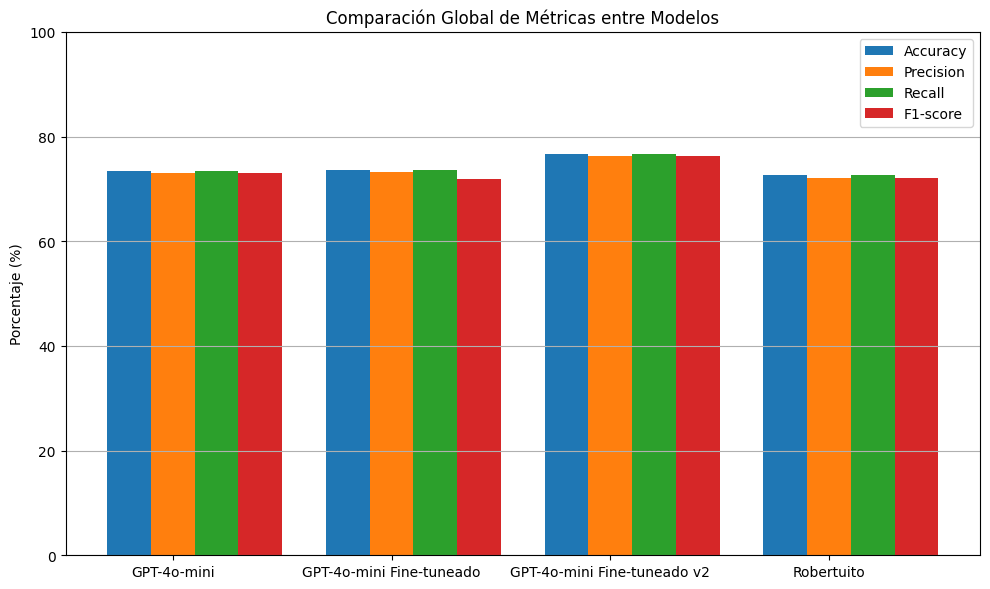

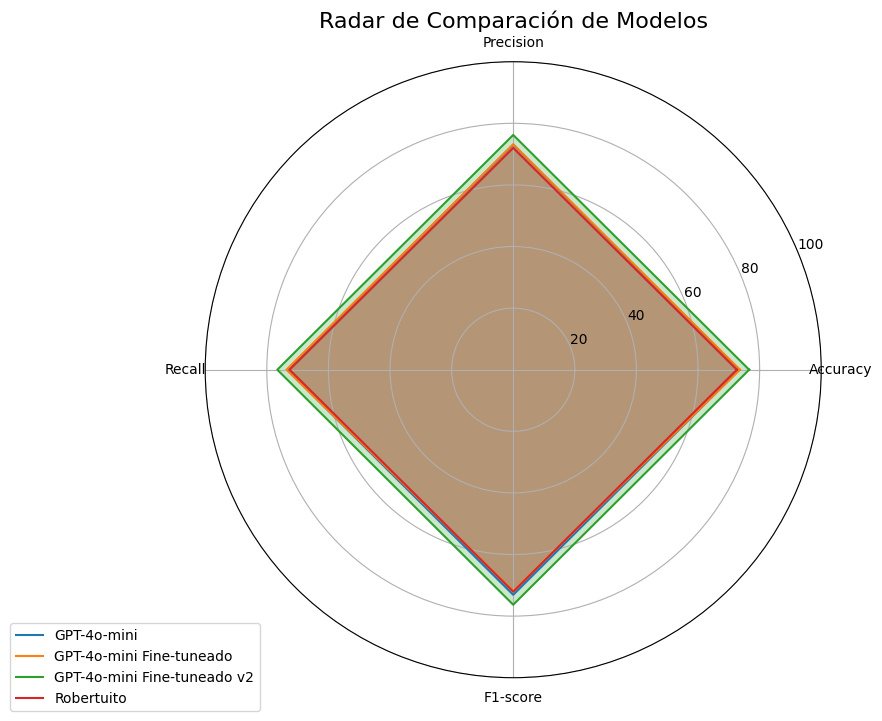

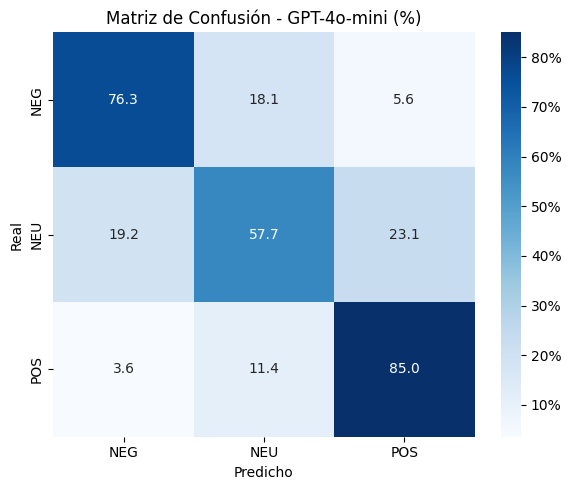

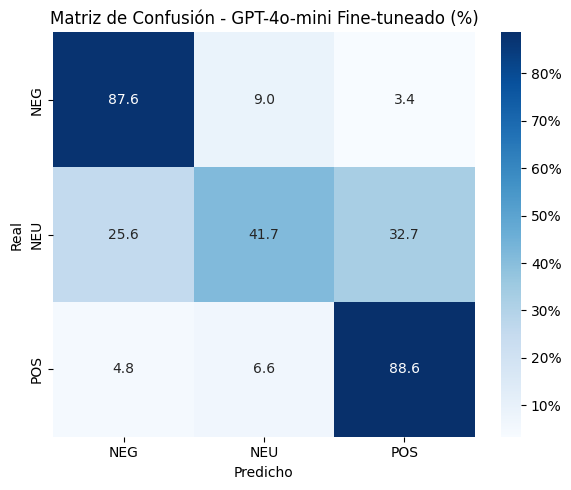

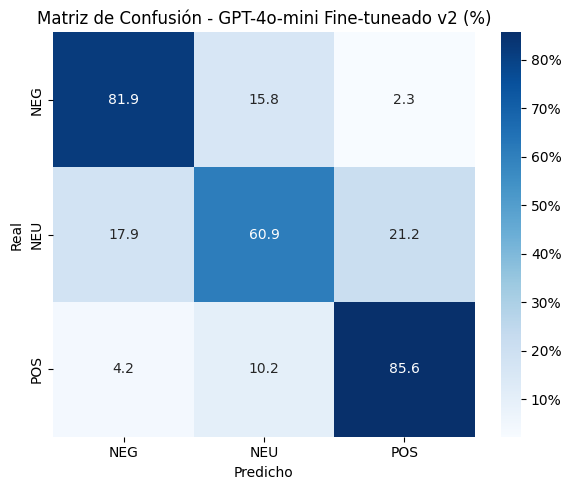

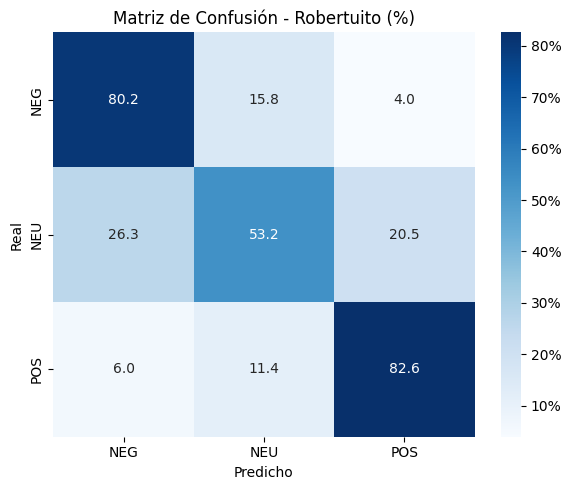

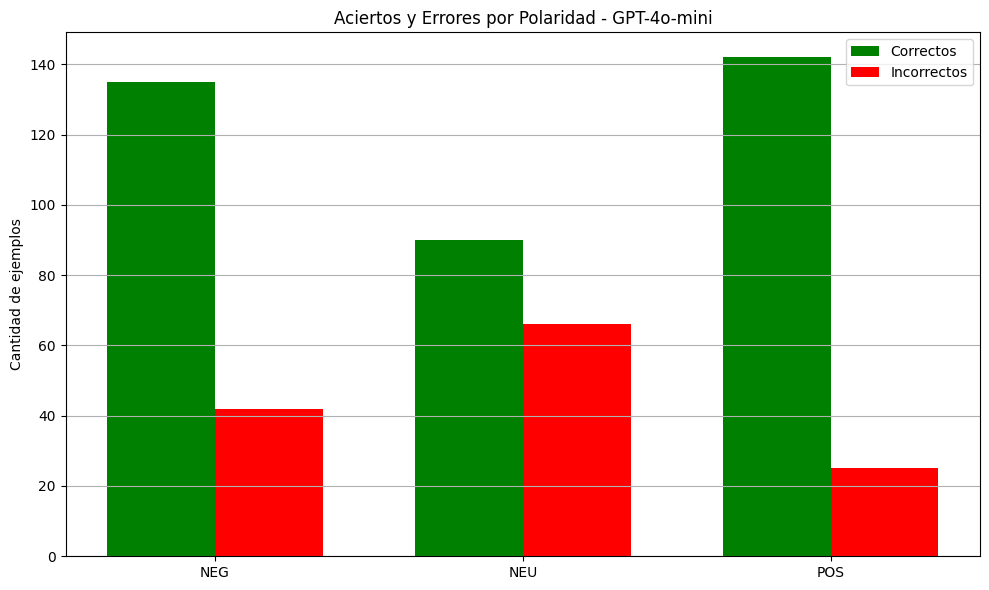

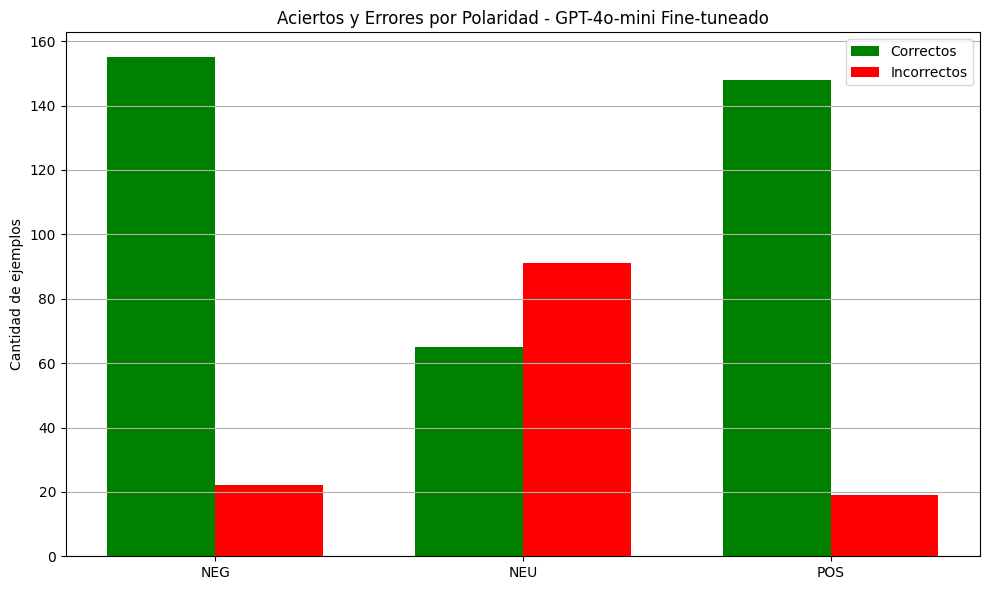

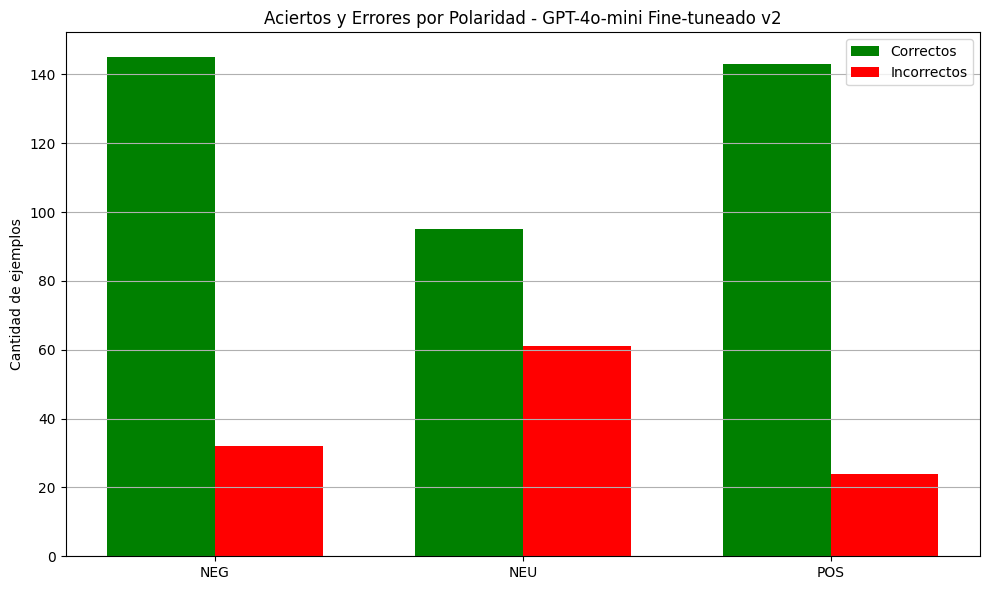

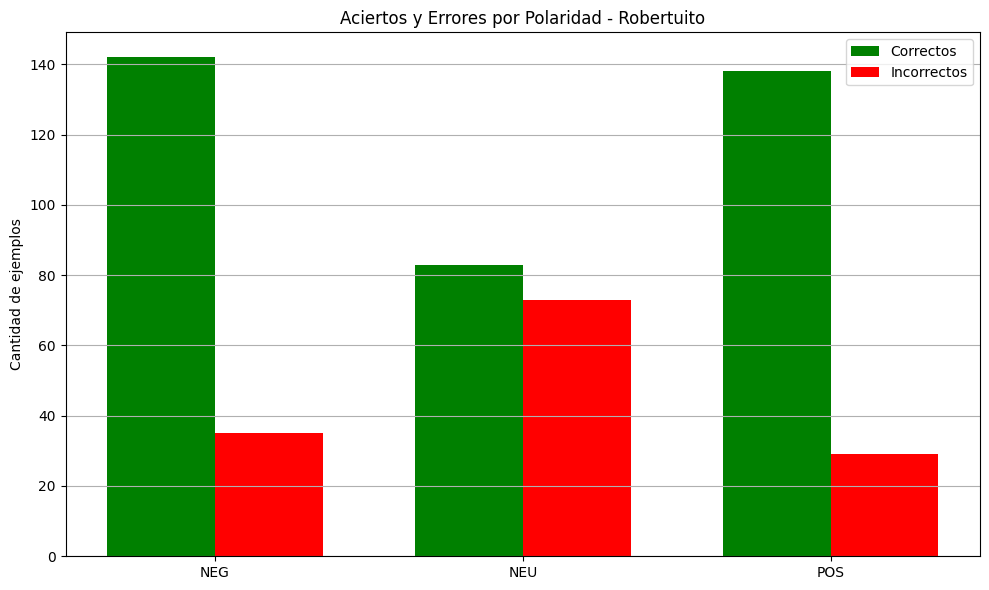

In [10]:
plot_global_metrics(metrics_df)
plot_radar(metrics_df)
plot_confusion_matrices(df, true_col, model_cols, model_names)
plot_polarity_accuracy(df, true_col, model_cols, model_names)
